# Hierarchical clustering

One main disadvantage of K-Means is that it needs us to pre-enter the number of clusters (K). Hierarchical clustering is an alternative approach which does not need us to give the value of K beforehand and also, it creates a beautiful tree-based structure for visualization.
Here, we are going to discuss the bottom-up (or Agglomerative) approach of cluster building. We start by defining any sort of similarity between the datapoints. Generally, we consider the Euclidean distance. The points which are closer to each are more similar than the points which re farther away. The Algorithms starts with considering all points as separate clusters and then grouping pints together to form clusters.

#### The Algorithm:
1. Begin with n observations and a measure (such as Euclidean distance) of all the n(n-1)/2 pairwise dissimilarities (or the Euclidean distances generally). Treat each observation as its own cluster. Initially, we have n clusters.
2. Compare all the distances and put the two closest points/clusters in the same cluster. The dissimilarity (or the Euclidean distances) between these two clusters indicates the height in the dendrogram at which the fusion line should be placed. 3. Compute the new pairwise inter-cluster dissimilarities (or the Euclidean distances) among the remaining clusters. 4. Repeat steps 2 and 3 till we have only one cluster left.

##### Code Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# dataset

X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Some theory about linkages

Initially, hierarchical clustering starts out with clusters consisting of individual points.
Later, it compares clusters with each other and merges the two "closest" clusters.
Since clusters are sets of points, there are various linkage methods:

- **Single Linkage:** cluster distance = smallest pairwise distance • Complete Linkage: cluster distance = largest pairwise distance
- **Average Linkage:** cluster distance = average pairwise distance
- **Centroid Linkage:** cluster distance= distance between the centroids of the clusters
- **Ward's Linkage:** cluster criteria= Minimize the variance in the cluster

In [6]:
import scipy.cluster.hierarchy as sch

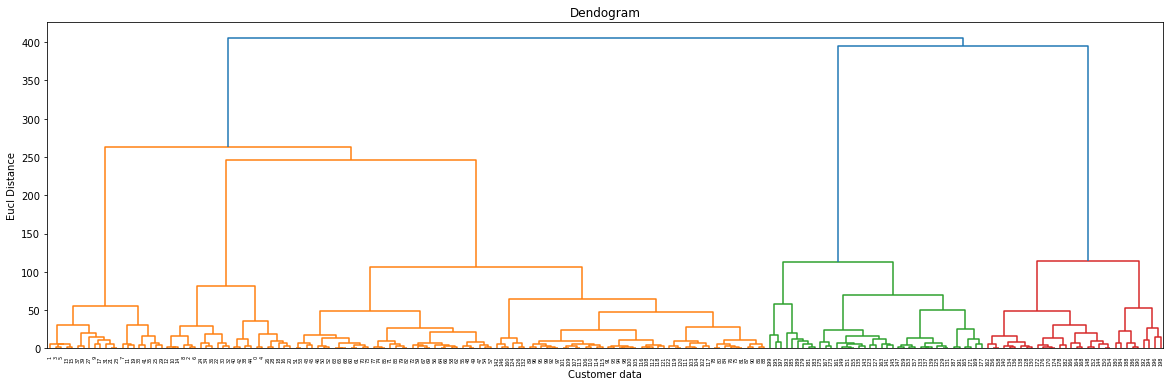

In [12]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
group = AgglomerativeClustering(n_clusters=3)
cluster = group.fit_predict(X)
print (cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [14]:
# Model evaluation tool
from sklearn.metrics import silhouette_score

# Check how well your model is making clusters
silhouette_score(X,cluster)

0.4618340266628975

In [15]:
# Save data according to the cluster for further analysis/process.

customer_cluster_0 = dataset[cluster==0]
customer_cluster_1 = dataset[cluster==1]
customer_cluster_2 = dataset[cluster==2]

In [16]:
print (customer_cluster_2)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
123         124    Male   39                  69                      91
125         126  Female   31                  70                      77
127         128    Male   40                  71                      95
129         130    Male   38                  71                      75
131         132    Male   39                  71                      75
133         134  Female   31                  72                      71
135         136  Female   29                  73                      88
137         138    Male   32                  73                      73
139         140  Female   35                  74                      72
141         142    Male   32                  75                      93
143         144  Female   32                  76                      87
145         146    Male   28                  77                      97
147         148  Female   32                  77   

### **DBSCAN(Density Based Spatial Clustering of Apllications with Noise)**
It is an unsupervised machine learning algorithm. This algorithm defines clusters as continuous regions of high density.
Some definitions first:

- **Epsilon:** This is also called eps. This is the distance till which we look for the neighbouring points.
- **Min_points:** The minimum number of points specified by the user.
- **Core Points:** If the number of points inside the eps radius of a point is greater than or equal to the min_points then it's called a core point.
- **Border Points:** If the number of points inside the eps radius of a point is less than the min_points and it lies within the eps radius region of a core point, it's called a border point.
- **Noise:** A point which is neither a core nor a border point is a noise point.

Let's say if the eps 1 and min_points =4
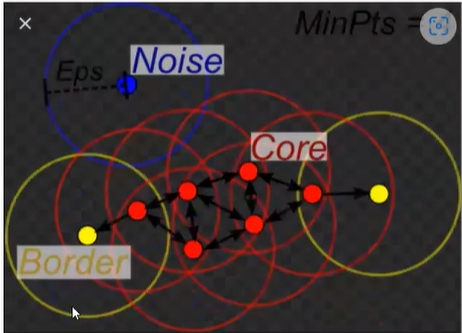

###### Algorithm Steps:
1. The algorithm starts with a random point in the dataset which has not been visited yet and its neighbouring points are identified based on the eps value.
2. If the point contains greater than or equal points than the min_pts, then the cluster formation starts and this point becomes a core point, else it's considered as noise. The thing to note here is that a point initially classified as noise can later become a border point if it's in the eps radius of a core point.
3. If the point is a core point, then all its neighbours become a part of the cluster. If the points in the neighbourhood turn out to be core points then their neighbours are also part of the cluster.
4. Repeat the steps above until all points are classified into different clusters or noises.

This algorithm works well if all the clusters are dense enough, and they are well separated by low-density regions.

###### Python Example

In [17]:
# Necessary Imports

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [19]:
# Data creation

centers = [[1,1], [-1,-1],[1,-1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0) # Generate sample blobs

In [20]:
X = StandardScaler().fit_transform(X)
X[:5]

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       [ 0.11900101, -1.05397553],
       [ 1.1224246 ,  1.77493654]])

In [47]:
# DBSCAN

db = DBSCAN(eps=0.29, min_samples=3).fit(X)

In [48]:
labels = db.labels_ # Similar to the model.fit() method, it give the labels  of the clustered data

print (labels)

[ 0  1  0  1  0  1  1  1  0  0  1  1  1  1  1  0 -1  1  1  1  1  1  1  1
  1  1  1  0  0  1  0  1  1  0  1  0  1  0  0  1  1  1  1  1  1  1  0  1
  0  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  0  1  1  0  0  0  1
  0  0  1  1  0  1  0  1  1  1  0  0  0  0  1  1  1  1  1  0  1  0  1 -1
  1  1  0  0  1  1  1  0  1  1  1  1  0  0  0  1  1  1  1  0  0  1  0  1
  1  1  0  0  1  1  1  0  0  1  0  1  1  1  0 -1  1  1  0  1  0  1  0  0
  1  1  1  1  1  0  1  1  1  1  1  1  0  1  0  1  0  1  0  1  1  2  1  1
  1  1  0  1  1  1  1  1  1  1  1  0  1  1  0  0  1  0  0  1  0  1  0  1
  1  1  1  0  0  1  1  1  1  1  1  1  1  0  1  0  1  1  0  1  1  1  0  0
  1  1  1  1  1  1  1  1  1  1  0  0  1  0  0  0  1  0  1  1  1  1  1  1
  0  1  1  1  1  1  1  1  0  0  1  1  1  0  1  0  1  0  1  1  1  1  1  1
  1  0  0  1  1  0  0  1  1 -1  1  1  1  1  1  1  0  1  1  0  1  1  1  0
  1  1  0  0  1  0  1  0  1  1  0  0  0  1  1  1  1  1  0  1  1  0  0  1
  1  1  1  1  1  0  1  1  1  1  0  0  1  1  1  0  1

In [49]:
len(set(labels))

4

In [50]:
1 if -1 in labels else 0

1

In [51]:
# Number of clusters in labels, ignoring noise if present.

n_cluster_ = len(set(labels)) - (1 if -1 in labels else 0)  # the label -1 is considered as noise
n_noise_ = list(labels).count(-1)  # Calculating the number of noises

In [52]:
print('Estimated number of clusters: %d' % n_cluster_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 4


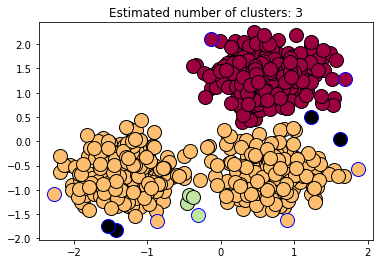

In [53]:
# Below code is for showcasing in diagram. Nothing related to model building

core_samples_mask = np.zeros_like(db.labels_, dtype = bool) # creating an array of True and False

core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True


# Plot result
import matplotlib.pyplot as plt

# Black is used for noise.
unique_labels = set(labels)  # Identifying all the unique labels/ clusters

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0,1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    
    if k == -1:
        
        col = [0,0,0,1]
        
    class_member_mask = (labels == k) # Assigning class members for each class
    
    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class 
    
    plt.plot(xy[:,0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k',markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask] # Creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='b', markersize=14)

plt.title('Estimated number of clusters: %d' % n_cluster_)
plt.show()

### Finding counts in each cluster

In [54]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([  4, 247, 495,   4], dtype=int64))

###### Select only noises or outliers for further action.

In [55]:
noises = X[labels == -1]

print (noises)

[[-1.4302079  -1.82380068]
 [ 1.22425496  0.50161091]
 [-1.53199232 -1.74146844]
 [ 1.62198217  0.05020132]]


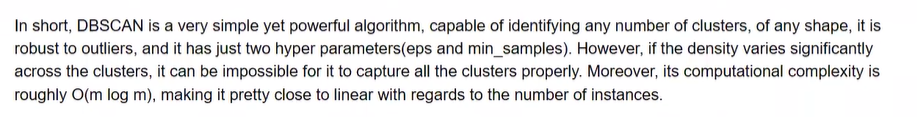